# 得出结论
使用下列空间来处理数据集`clean_08.csv` 和`clean_18.csv`中的以下问题

In [36]:
# load datasets
import pandas as pd
df_08 =pd.read_csv('clean_08.csv')
df_18 =pd.read_csv('clean_18.csv')

### Q1: 是否有更多使用替代燃料来源的独特模式？ 具体多多少？

### Q2: 车辆级别在燃油经济性方面有多少改进？
### Q3: SmartWay 车辆的特点是什么？ 它们是否随着时间而改变？

### Q4: 哪些功能与更好的燃油经济性有关?  
***

Q1: 与2008年相比，2018年是否有更多的车型（去重后）使用替代能源？比例增长了多少？

Q2: 各车辆类别（veh_class）在燃料经济性方面的改进（mpg 的增长）是多少？

Q3: SmartWay 车辆的特点是什么？它们是否随时间推移发生了改变？（mpg，温室气体排放量）

Q4: 哪些特征与更好的燃料经济性 (mpg) 相关联？

***

### Q1: 与2008年相比，2018年是否有更多的车型（去重后）使用替代能源？比例增长了多少？

In [37]:
df_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

* 求使用替代能源的车的数量

获取`model`列的去重值后的数量

In [38]:
len(df_08['model'].unique())

377

In [39]:
df_18['fuel'].unique()

array(['Gasoline', 'Diesel', 'Ethanol', 'Electricity', 'Gas'], dtype=object)

现有的汽车能源类型如下：  
- Gasoline:汽油
- Diesel：柴油
- Ethanol：乙醇
- Gas：天然气  
- Electricity:电动

获取18年汽车使用乙醇以及天然气作为替代能源的数量

** 使用 `df.列名.value_counts()` 获取该列不同值出现的次数 **

In [40]:
df_08.fuel.value_counts()

Gasoline    984
gas           1
ethanol       1
CNG           1
Name: fuel, dtype: int64

In [41]:
df_18.fuel.value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

#### 1.1 获取08与18年df中的新能源汽车的品种（去重后）的数量

In [42]:
# 获取08的数据中fuel包含cng与ethanol的，并找到唯一值得数量
alt_08=df_08.query('fuel in ["CNG","ethanol"]').model.nunique()
alt_08

2

In [43]:
df_08.query('fuel in ["CNG","ethanol"]')

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
388,HONDA Civic,1.8,4,Auto-L5,2WD,CNG,small car,9.5,24.0,36.0,28.0,9.0,yes
985,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,15.0,7.0,no


In [44]:
# 获取查询结果的df的 model 列
df_08.query('fuel in ["CNG","ethanol"]').model

388           HONDA Civic
985    MERCEDES-BENZ C300
Name: model, dtype: object

** df.nunique() **  
 DataFrame.nunique(axis=0, dropna=True)[source]

  Return Series with number of distinct observations over requested axis.
  
  axis : {0 or ‘index’, 1 or ‘columns’}, default 0   
  参考：api(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.nunique.html)

In [45]:
alt_18=df_18.query('fuel in ["Ethanol","Gas","Electricity"]').model.nunique()

In [46]:
alt_18

26

#### 1.2 绘图，使用柱状图

In [50]:
import matplotlib.pyplot as plt
% matplotlib inline
#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']

Text(0,0.5,'Number of Unique Models')

/Users/liusihan/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


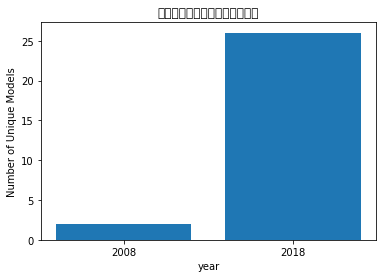

In [52]:
plt.bar(["2008","2018"],[alt_08,alt_18])
plt.title("使用替代能源的汽车种类的对比")
plt.xlabel("year")
plt.ylabel("Number of Unique Models")

#### 1.3 使用百分比的方式

In [53]:
total_08=df_08.model.nunique()
total_18=df_18.model.nunique()
total_08,total_18

(377, 357)

In [54]:
prop_08=alt_08/total_08
prop_18=alt_18/total_18
prop_08,prop_18

(0.005305039787798408, 0.07282913165266107)

/Users/liusihan/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


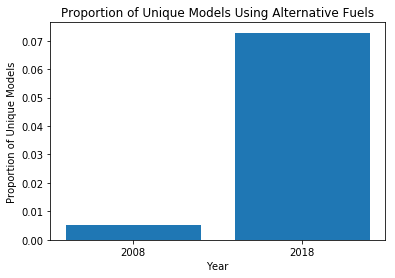

In [55]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

***

### Q2: 车辆级别在燃油经济性方面有多少改进?  
Let's look at the average fuel economy for each vehicle class for both years.

In [56]:
df_08.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4.0,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5.0,no


* 按照车辆类别分类后每种类别的综合油耗的平均数

In [62]:
# veh_class 为车辆类别
# cmb_mpg 为综合油耗
veh_08=df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [64]:
veh_18=df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

### 2.2 获取每种类别的车型，08年与18年的油耗增长差别

In [65]:
inc=veh_18-veh_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

发现inc中有nan值，需要先剔除掉  
使用 `dropna`方法

In [66]:
inc.dropna(inplace=True)

Text(0,0.5,'Increase in Average Combined MPG')

/Users/liusihan/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


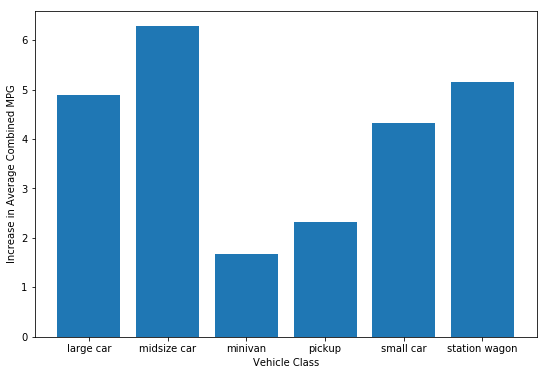

In [68]:
plt.subplots(figsize=(9,6))
plt.bar(inc.index,inc)
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG')

***

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?    
### SmartWay 车辆的特点是什么？ 它们是否随着时间而改变？  
We can analyze this by filtering each dataframe by SmartWay classification and exploring these datasets.  
我们可以通过使用SmartWay分类和探索这些数据集来过滤每个dataframe进行分析。

In [69]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4.0,no


In [71]:
df_08.smartway.value_counts()

no     607
yes    380
Name: smartway, dtype: int64

发现smartway只有y与n两种类型

In [72]:
smart_08=df_08.query('smartway=="yes"')

In [73]:
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [74]:
df_18.smartway.value_counts()

No       724
Yes       91
Elite     17
Name: smartway, dtype: int64

发现多了一种，现在有三种；获取`Yes`与`Elite`

In [75]:
smart_18=df_18.query('smartway in ["Yes","Elite"]')

In [76]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q4: What features are associated with better fuel economy?
### Q4: 哪些功能与更好的燃油经济性有关?  
** You can explore trends between cmb_mpg and the other features in this dataset, or filter this dataset like in the previous question and explore the properties of that dataset. For example, you can select all vehicles that have the top 50% fuel economy ratings like this.**  
** 哪些特征与更好的燃料经济性 (mpg) 相关联？**


我的思路，获取每个特征的散点图，获取线性关系

In [77]:
len(df_08.columns)

13

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1111f07b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111b4d7f0>]], dtype=object)

/Users/liusihan/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


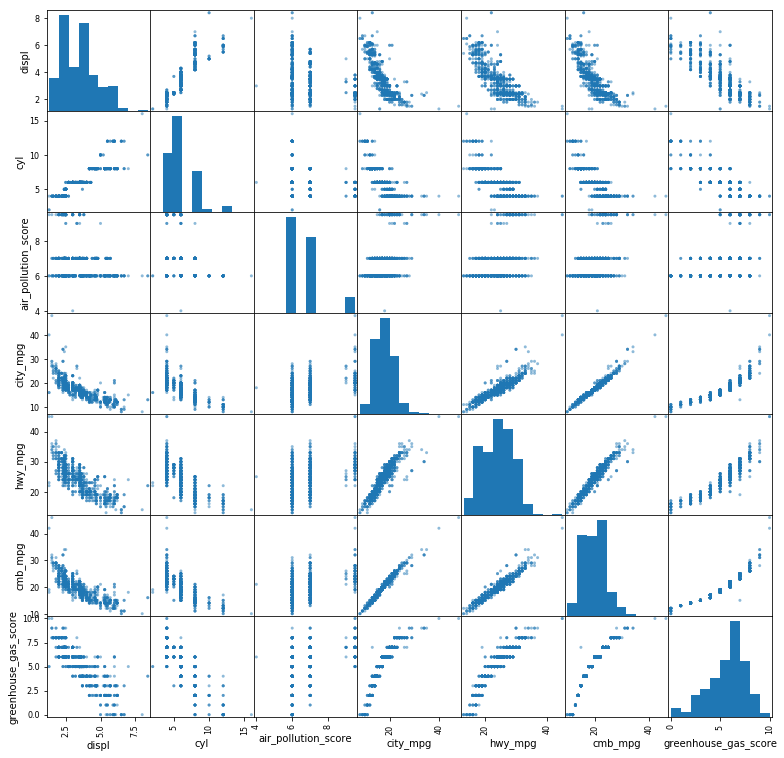

In [78]:
pd.plotting.scatter_matrix(df_08,figsize=(13,13))

通过上图可见，`cmb_mpg` 成正相关的主要有 `city_mpg` 与 `hwy_mpg`，呈负相关的是`displ`（发动机排量）